# **SENTIMENT ANALYSIS CLASSIFICATION USING RNN**



In [75]:
import numpy as np
import keras
from keras import layers
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## DATA PROCESSING

In [76]:
max_features = 20000
maxlen = 200
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features) # Loading the data
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.utils.pad_sequences(x_val, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


## BIDIRECTIONAL - SIMPLE RNN

Building the model

In [77]:
# Building Bidrectional Simple RNN model
inputs_birnn = keras.Input(shape=(None,), dtype="int32")
x_birnn = layers.Embedding(max_features, 128)(inputs_birnn)
x_birnn = layers.Bidirectional(layers.SimpleRNN(64, return_sequences=True))(x_birnn)
x_birnn = layers.Bidirectional(layers.SimpleRNN(64))(x_birnn)
outputs_birnn = layers.Dense(1, activation="sigmoid")(x_birnn)
model_birnn = keras.Model(inputs_birnn, outputs_birnn)
model_birnn.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_16 (Embedding)             │ (None, None, 128)           │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_32 (Bidirectional)     │ (None, None, 128)           │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_33 (Bidirectional)     │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,609,537 (9.95 MB)

 Trainable params: 2,609,537 (9.95 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [78]:
model_birnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compiling the model
model_birnn.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)) # Training the model

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 132ms/step - accuracy: 0.6652 - loss: 0.5876 - val_accuracy: 0.7901 - val_loss: 0.4623
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.8302 - loss: 0.3941 - val_accuracy: 0.7664 - val_loss: 0.5065


Generating Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step


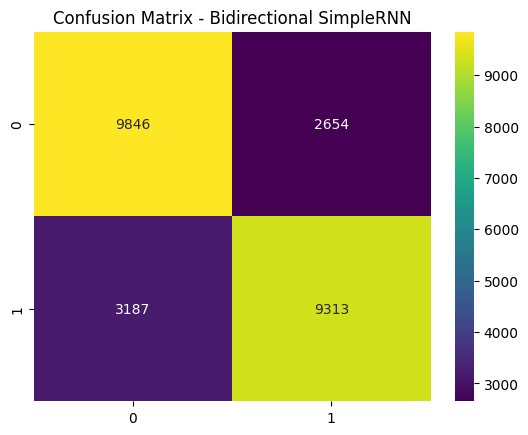

In [79]:
y_birnn = (model_birnn.predict(x_val) > 0.5).astype(int)
confmat_birnn = confusion_matrix(y_val, y_birnn)  # Computing the confusion matrix
precision_birnn = precision_score(y_val, y_birnn) # Computing the precision score
recall_birnn = recall_score(y_val, y_birnn) # Computing the recall score
f1_birnn = f1_score(y_val, y_birnn) # Computing the F1 score
sns.heatmap(confmat_birnn, annot=True, fmt='d', cmap='viridis') # Plotting the confusion matrix
plt.title('Confusion Matrix - Bidirectional SimpleRNN')
plt.show()

## BIDIRECTIONAL - LSTM

Building the model

In [80]:
# Building Bidrectional LSTM model
inputs_biLSTM = keras.Input(shape=(None,), dtype="int32")
x_biLSTM = layers.Embedding(max_features, 128)(inputs_biLSTM)
x_biLSTM = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x_biLSTM)
x_biLSTM = layers.Bidirectional(layers.LSTM(64))(x_biLSTM)
outputs_biLSTM = layers.Dense(1, activation="sigmoid")(x_biLSTM)
model_biLSTM = keras.Model(inputs_biLSTM, outputs_biLSTM)
model_biLSTM.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_17 (Embedding)             │ (None, None, 128)           │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_34 (Bidirectional)     │ (None, None, 128)           │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_35 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,757,761 (10.52 MB)

 Trainable params: 2,757,761 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [81]:
model_biLSTM.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compiling the model
model_biLSTM.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)) # Training the model

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.7410 - loss: 0.4936 - val_accuracy: 0.8633 - val_loss: 0.3241
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9194 - loss: 0.2124 - val_accuracy: 0.8685 - val_loss: 0.3490


Generating Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step


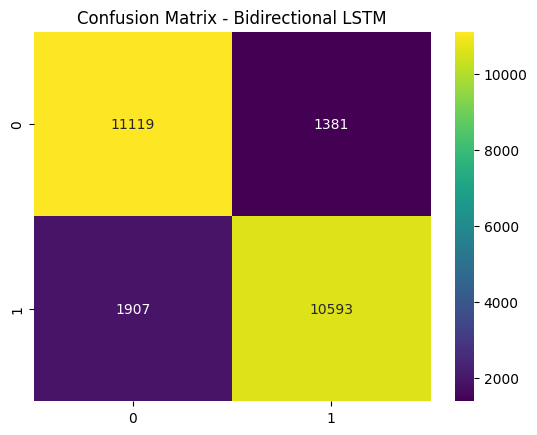

In [82]:
y_biLSTM = (model_biLSTM.predict(x_val) > 0.5).astype(int)
confmat_biLSTM = confusion_matrix(y_val, y_biLSTM)  # Computing the confusion matrix
precision_biLSTM = precision_score(y_val, y_biLSTM) # Computing the precision score
recall_biLSTM = recall_score(y_val, y_biLSTM) # Computing the recall score
f1_biLSTM = f1_score(y_val, y_biLSTM) # Computing the F1 score
sns.heatmap(confmat_biLSTM, annot=True, fmt='d', cmap='viridis') # Plotting the confusion matrix
plt.title('Confusion Matrix - Bidirectional LSTM')
plt.show()

## BIDIRECTIONAL - GRU

Building the model

In [83]:
# Building Bidrectional GRU model
inputs_biGRU = keras.Input(shape=(None,), dtype="int32")
x_biGRU = layers.Embedding(max_features, 128)(inputs_biGRU)
x_biGRU = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x_biGRU)
x_biGRU = layers.Bidirectional(layers.GRU(64))(x_biGRU)
outputs_biGRU = layers.Dense(1, activation="sigmoid")(x_biGRU)
model_biGRU = keras.Model(inputs_biGRU, outputs_biGRU)
model_biGRU.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, None)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_18 (Embedding)             │ (None, None, 128)           │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_36 (Bidirectional)     │ (None, None, 128)           │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_37 (Bidirectional)     │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,709,121 (10.33 MB)

 Trainable params: 2,709,121 (10.33 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [84]:
model_biGRU.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compiling the model
model_biGRU.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)) # Training the model

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.7292 - loss: 0.5109 - val_accuracy: 0.8658 - val_loss: 0.3412
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.9220 - loss: 0.2065 - val_accuracy: 0.8702 - val_loss: 0.3181


Generating Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


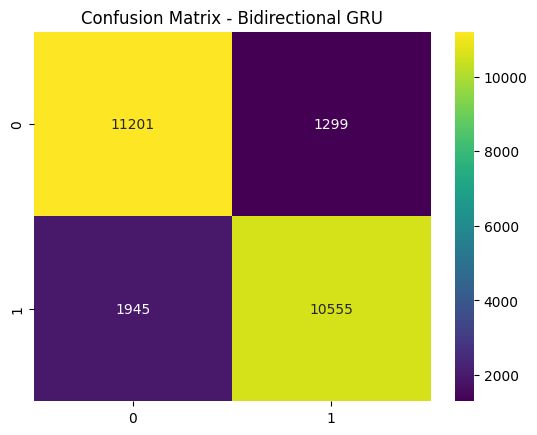

In [85]:
y_biGRU = (model_biGRU.predict(x_val) > 0.5).astype(int)
confmat_biGRU = confusion_matrix(y_val, y_biGRU)  # Computing the confusion matrix
precision_biGRU = precision_score(y_val, y_biGRU) # Computing the precision score
recall_biGRU = recall_score(y_val, y_biGRU) # Computing the recall score
f1_biGRU = f1_score(y_val, y_biGRU) # Computing the F1 score
sns.heatmap(confmat_biGRU, annot=True, fmt='d', cmap='viridis') # Plotting the confusion matrix
plt.title('Confusion Matrix - Bidirectional GRU')
plt.show()

## BAR PLOTS

Precision Score

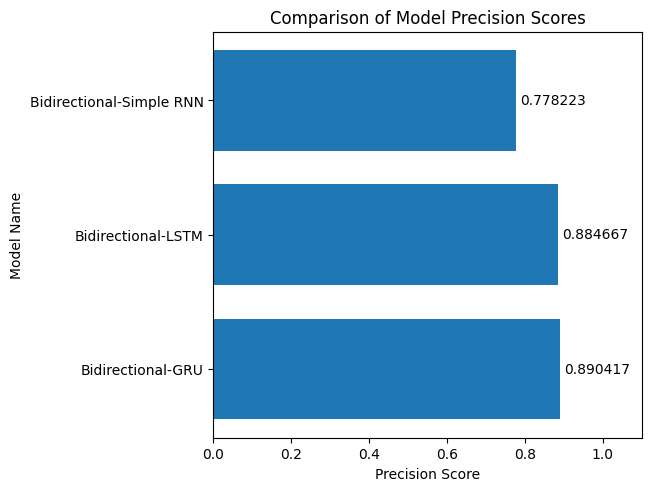

In [86]:
precision_results = {"Bidirectional-Simple RNN":precision_birnn,"Bidirectional-LSTM":precision_biLSTM,"Bidirectional-GRU":precision_biGRU}
precision_values = list(precision_results.items())

# Plotting the precision scores
fig, ax = plt.subplots(layout='constrained')

y_axis = [i for i in range(0,12,4)]
graph = ax.barh(y_axis,precision_results.values(),height=3)
ax.bar_label(graph,padding=3)

ax.set_xlabel("Precision Score")
ax.set_ylabel("Model Name")
ax.set_title("Comparison of Model Precision Scores")
ax.set_yticks(y_axis,precision_results.keys())
ax.invert_yaxis()
ax.set_xlim(0,1.1)
plt.show()

Recall Score

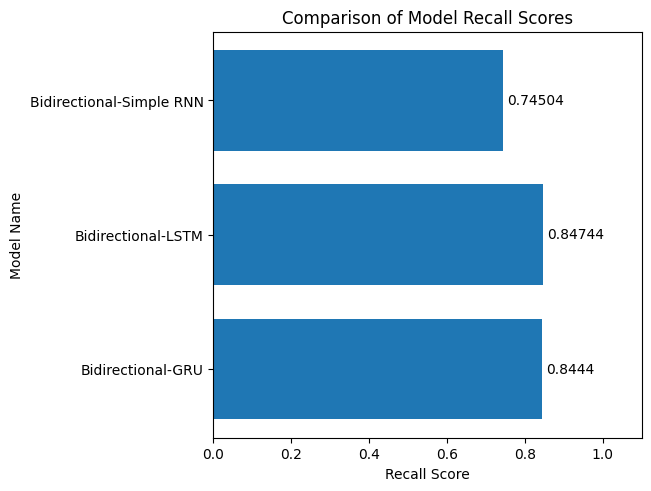

In [87]:
recall_results = {"Bidirectional-Simple RNN":recall_birnn,"Bidirectional-LSTM":recall_biLSTM,"Bidirectional-GRU":recall_biGRU}
recall_values = list(recall_results.items())

# Plotting the precision scores
fig, ax = plt.subplots(layout='constrained')

y_axis = [i for i in range(0,12,4)]
graph = ax.barh(y_axis,recall_results.values(),height=3)
ax.bar_label(graph,padding=3)

ax.set_xlabel("Recall Score")
ax.set_ylabel("Model Name")
ax.set_title("Comparison of Model Recall Scores")
ax.set_yticks(y_axis,recall_results.keys())
ax.invert_yaxis()
ax.set_xlim(0,1.1)
plt.show()

F1 Score

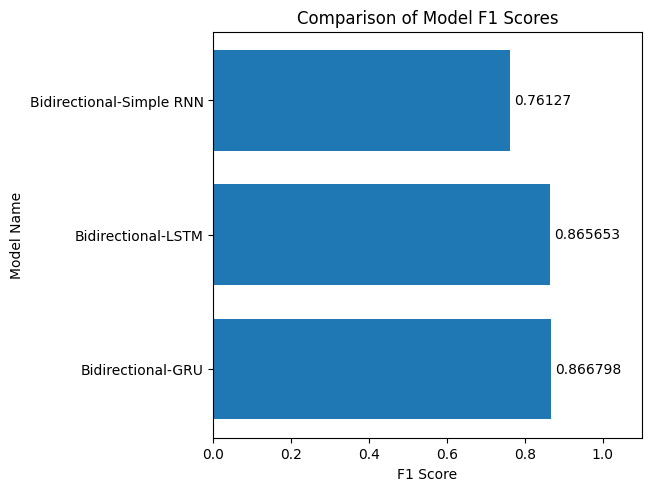

In [88]:
f1_results = {"Bidirectional-Simple RNN":f1_birnn,"Bidirectional-LSTM":f1_biLSTM,"Bidirectional-GRU":f1_biGRU}
f1_values = list(f1_results.items())

# Plotting the precision scores
fig, ax = plt.subplots(layout='constrained')

y_axis = [i for i in range(0,12,4)]
graph = ax.barh(y_axis,f1_results.values(),height=3)
ax.bar_label(graph,padding=3)

ax.set_xlabel("F1 Score")
ax.set_ylabel("Model Name")
ax.set_title("Comparison of Model F1 Scores")
ax.set_yticks(y_axis,f1_results.keys())
ax.invert_yaxis()
ax.set_xlim(0,1.1)
plt.show()